### Se da el siguiente texto y se pide contar las palabra más comunes para realizar alguna tarea de análisis de texto.

<em>"Junkfood - Food that do no good to our body. And there's no need of them in our body but still we willingly eat them because they are great in taste and easy to cook or ready to eat. Junk foods have no or very less nutritional value and irrespective of the way they are marketed, they are not healthy to consume.The only reason of their gaining popularity and increased trend of consumption is
that they are ready to eat or easy to cook foods. People, of all age groups are moving towards Junkfood as it is hassle free and often ready to grab and eat. Cold drinks, chips, noodles, pizza, burgers, French fries etc. are few examples from the great variety of junk food available in the market.

 Junkfood is the most dangerous food ever but it is pleasure in eating and it gives a great taste in mouth examples of Junkfood are kurkure and chips.. cold rings are also source of junk food... they should not be ate in high amounts as it results fatal to our body... it can be eated in a limited extend ... in research it's found tht ths junk foods are very dangerous fr our health
Junkfood is very harmful that is slowly eating away the health of the present generation. The term itself denotes how dangerous it is for our bodies. Most importantly, it tastes so good that people consume it on a daily basis. However, not much awareness is spread about the harmful effects of Junkfood .

The problem is more serious than you think. Various studies show that Junkfood impacts our health negatively. They contain higher levels of calories, fats, and sugar. On the contrary, they have very low amounts of healthy nutrients and lack dietary fibers. Parents must discourage their children from consuming junk food because of the ill effects it has on one’s health.
Junkfood is the easiest way to gain unhealthy weight. The amount of fats and sugar in the food makes you gain weight rapidly. However, this is not a healthy weight. It is more of fats and cholesterol which will have a harmful impact on your health. Junk food is also one of the main reasons for the increase in obesity nowadays.

This food only looks and tastes good, other than that, it has no positive points. The amount of calories your body requires to stay fit is not fulfilled by this food. For instance, foods like French fries, burgers, candy, and cookies, all have high amounts of sugar and fats. Therefore, this can result in long-term illnesses like diabetes and high blood pressure. This may also result in kidney failure."</em>

1. Implementa esta tarea en Python
2. ¿Qué consideraciones para realizar esta tarea hiciste?


### 1. Implementa esta tarea en Python

Para iniciar esta tarea, Importaremos las librerias necesarias para realizar el análisis de texto. En este caso, utilizaremos la libreria de NLTK para remover las palabras vacias (stopwords), la libreria re para remover los signos de puntuación, los espacios inecesarios entre otros elementos irrelevantes, la libreria collections para contar las palabras más comunes, la libreria pandas para crear un DataFrame y la libreria matplotlib y seaborn para visualizar los resultados.

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
#download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Ahora, por simplicidad copiaremos el texto. Este u otros varios textos pueden estar contenidos en un archivo .csv, .json, etc. El cual es fácilmente manipulable con pandas.

In [2]:
text = """Junkfood - Food that do no good to our body. And there's no need of them in our body but still we willingly eat them because they are great in taste and easy to cook or ready to eat. Junk foods have no or very less nutritional value and irrespective of the way they are marketed, they are not healthy to consume.The only reason of their gaining popularity and increased trend of consumption is
that they are ready to eat or easy to cook foods. People, of all age groups are moving towards Junkfood as it is hassle free and often ready to grab and eat. Cold drinks, chips, noodles, pizza, burgers, French fries etc. are few examples from the great variety of junk food available in the market.
 Junkfood is the most dangerous food ever but it is pleasure in eating and it gives a great taste in mouth examples of Junkfood are kurkure and chips.. cold rings are also source of junk food... they should not be ate in high amounts as it results fatal to our body... it can be eated in a limited extend ... in research it's found tht ths junk foods are very dangerous fr our health
Junkfood is very harmful that is slowly eating away the health of the present generation. The term itself denotes how dangerous it is for our bodies. Most importantly, it tastes so good that people consume it on a daily basis. However, not much awareness is spread about the harmful effects of Junkfood .
The problem is more serious than you think. Various studies show that Junkfood impacts our health negatively. They contain higher levels of calories, fats, and sugar. On the contrary, they have very low amounts of healthy nutrients and lack dietary fibers. Parents must discourage their children from consuming junk food because of the ill effects it has on one’s health.
Junkfood is the easiest way to gain unhealthy weight. The amount of fats and sugar in the food makes you gain weight rapidly. However, this is not a healthy weight. It is more of fats and cholesterol which will have a harmful impact on your health. Junk food is also one of the main reasons for the increase in obesity nowadays.
This food only looks and tastes good, other than that, it has no positive points. The amount of calories your body requires to stay fit is not fulfilled by this food. For instance, foods like French fries, burgers, candy, and cookies, all have high amounts of sugar and fats. Therefore, this can result in long-term illnesses like diabetes and high blood pressure. This may also result in kidney failure."""

In [3]:
#observemos el tipo de la variable text, se espera que sea del tipo str
print(type(text))
#efectivamente es str

<class 'str'>


In [4]:
# Por sanidad imprimamos el texto
print(text)

Junkfood - Food that do no good to our body. And there's no need of them in our body but still we willingly eat them because they are great in taste and easy to cook or ready to eat. Junk foods have no or very less nutritional value and irrespective of the way they are marketed, they are not healthy to consume.The only reason of their gaining popularity and increased trend of consumption is
that they are ready to eat or easy to cook foods. People, of all age groups are moving towards Junkfood as it is hassle free and often ready to grab and eat. Cold drinks, chips, noodles, pizza, burgers, French fries etc. are few examples from the great variety of junk food available in the market.
 Junkfood is the most dangerous food ever but it is pleasure in eating and it gives a great taste in mouth examples of Junkfood are kurkure and chips.. cold rings are also source of junk food... they should not be ate in high amounts as it results fatal to our body... it can be eated in a limited extend ..

In [5]:
#El primer paso será pasar las palabras a minúsculas, pues sabemos que Example == example
#sin embargo, si esto no se hace el programa los clasificará como cadenas diferentes
processed_text = text.lower()

In [6]:
""" En ocasiones pueden existir errores en cuanto a los espacios y los signos de puntuacion
por ejemplo en el tercer renglón del texto "healthy to consume.The only"
este error gramatical se considerará por el programa como una sola palabra consume.the
Para atacar este problema hay que identificar todos los signos de puntuacion y añadir un espacio antes
y después de cada signo, por ejemplo convertir "consume.The" a "consume . The"
Nota las contracciones no se consideran (have'nt)
"""
#Para esta identificación y separacion usamos la libreria re con el método sub
processed_text = re.sub(r'[]!"$%&\()*=#@+,./:;?[\\^_`{|}~-]+', r' \g<0> ', processed_text)

#explicacióm: los simbolos []!"$%&\()*=#@+,./:;?[\\^_`{|}~-]+ encuentran uno o más signos de puntuación en el texto
#mientras que la cadena a reemplazar ' \g<0> ' añade al inicio y al final de dichos símbolos un espacio adicional

#veamos el resultado de la operacion anterior
print(processed_text)

junkfood  -  food that do no good to our body .  and there's no need of them in our body but still we willingly eat them because they are great in taste and easy to cook or ready to eat .  junk foods have no or very less nutritional value and irrespective of the way they are marketed ,  they are not healthy to consume . the only reason of their gaining popularity and increased trend of consumption is
that they are ready to eat or easy to cook foods .  people ,  of all age groups are moving towards junkfood as it is hassle free and often ready to grab and eat .  cold drinks ,  chips ,  noodles ,  pizza ,  burgers ,  french fries etc .  are few examples from the great variety of junk food available in the market . 
 junkfood is the most dangerous food ever but it is pleasure in eating and it gives a great taste in mouth examples of junkfood are kurkure and chips ..  cold rings are also source of junk food ...  they should not be ate in high amounts as it results fatal to our body ...  it

In [7]:
#Una vez solucionada esta cuestion procedemos a remover los signos de puntuacion y los espacios inecesarios
# no remueve los apóstrofes
processed_text = re.sub(r"[^\w\d'\s]+", '', processed_text)
processed_text = re.sub(r"\s+", ' ', processed_text)
processed_text = processed_text.strip()
#veamos el resultado
print(processed_text)

junkfood food that do no good to our body and there's no need of them in our body but still we willingly eat them because they are great in taste and easy to cook or ready to eat junk foods have no or very less nutritional value and irrespective of the way they are marketed they are not healthy to consume the only reason of their gaining popularity and increased trend of consumption is that they are ready to eat or easy to cook foods people of all age groups are moving towards junkfood as it is hassle free and often ready to grab and eat cold drinks chips noodles pizza burgers french fries etc are few examples from the great variety of junk food available in the market junkfood is the most dangerous food ever but it is pleasure in eating and it gives a great taste in mouth examples of junkfood are kurkure and chips cold rings are also source of junk food they should not be ate in high amounts as it results fatal to our body it can be eated in a limited extend in research it's found tht

In [8]:
#Creemos una funcion para remover las stopwords
def remove_stopwords(text, stopwords_list):
    """ Función para remover las palabras vacías de un texto a partir de una lista de palabras vacías
    
    Args:
        text (str): Texto a remover palabras vacías
        stopwords_list (list): lista que contiene las palabras vacías
        
    Returns:
        str: texto sin las palabras vacías
    """
    #Divide la cedana de texto en una lista, donde cada palabra y puntuacion es un elemento de la lista
    processed_text = text.split()
    
    #Remueve las palabras vacias, a través de una lista comprensiva
    # convierte a minusculas nuevamente por sanidad
    processed_text = [word for word in processed_text if not word.lower() in stopwords_list]
    
    #regresa el texto sin stopwords en forma de string
    return ' '.join(processed_text)

In [9]:
# Instancia las palabras vacías del idioma inglés
stopwords_eng = stopwords.words('english')
# Crea una lista de palabras vacías personalidas, es útil cuando se quiere eliminar palabras que no necesariamente son
#vacías o que no existen en la libreria nltk
custom_stop = ["eg", "etc", "usw", "also", "ever"]
#combina ambas listas
stopwords_eng = stopwords_eng + custom_stop

In [10]:
#Remueve las palabras vacias del texto
processed_text = remove_stopwords(processed_text, stopwords_eng)

In [11]:
# Para contar las palabras debemos crear una Bag of Words (BOW)
def create_BOW(text):
    """ Función para crear una bolsa de palabras (Bag of Words) de un texto
    
    Args:
        text (str): Texto del cual se quiere crear la bolsa de palabras
        stopwords_list (list): lista que contiene las palabras vacías
        
    Returns:
        pd.DataFrame: Tabla con dos columnas palabra y frecuencia ordenadas de forma descendente
    """
    # Para contar las palabras requerimos de un conjunto único de palabras en el texto
    # este conjunto único lo podemos crear a partir del texto y el objeto set de python
    # Además para contar palabras el objeto más factible es un diccionario, con llave una palabra y valor
    # las veces que se repite. Sin embargo contar las palabras con el método .count() da resultados
    #inflados pues por ejemplo la palabra "food" la cuenta si encuentra una palabra como junkfood
    #Para sortear ello usaremos la libreria collections y usaremos el objeto counter
    bow = dict(Counter(text.split()))
    
        
    #Crea un dataframe a partir del diccionario bow
    bow = pd.DataFrame.from_dict(bow, orient='index', columns=['frecuencia'])
    bow = bow.reset_index().rename(columns={'index':'palabra'})
    bow.sort_values(by=['frecuencia', 'palabra'], ignore_index=True, inplace=True, ascending=False)
    return bow

In [12]:
bow_processed_text = create_BOW(processed_text)
bow_processed_text.head(8)

,palabra,frecuencia
0,food,9
1,junkfood,8
2,junk,6
3,health,5
4,foods,4
5,fats,4
6,eat,4
7,body,4


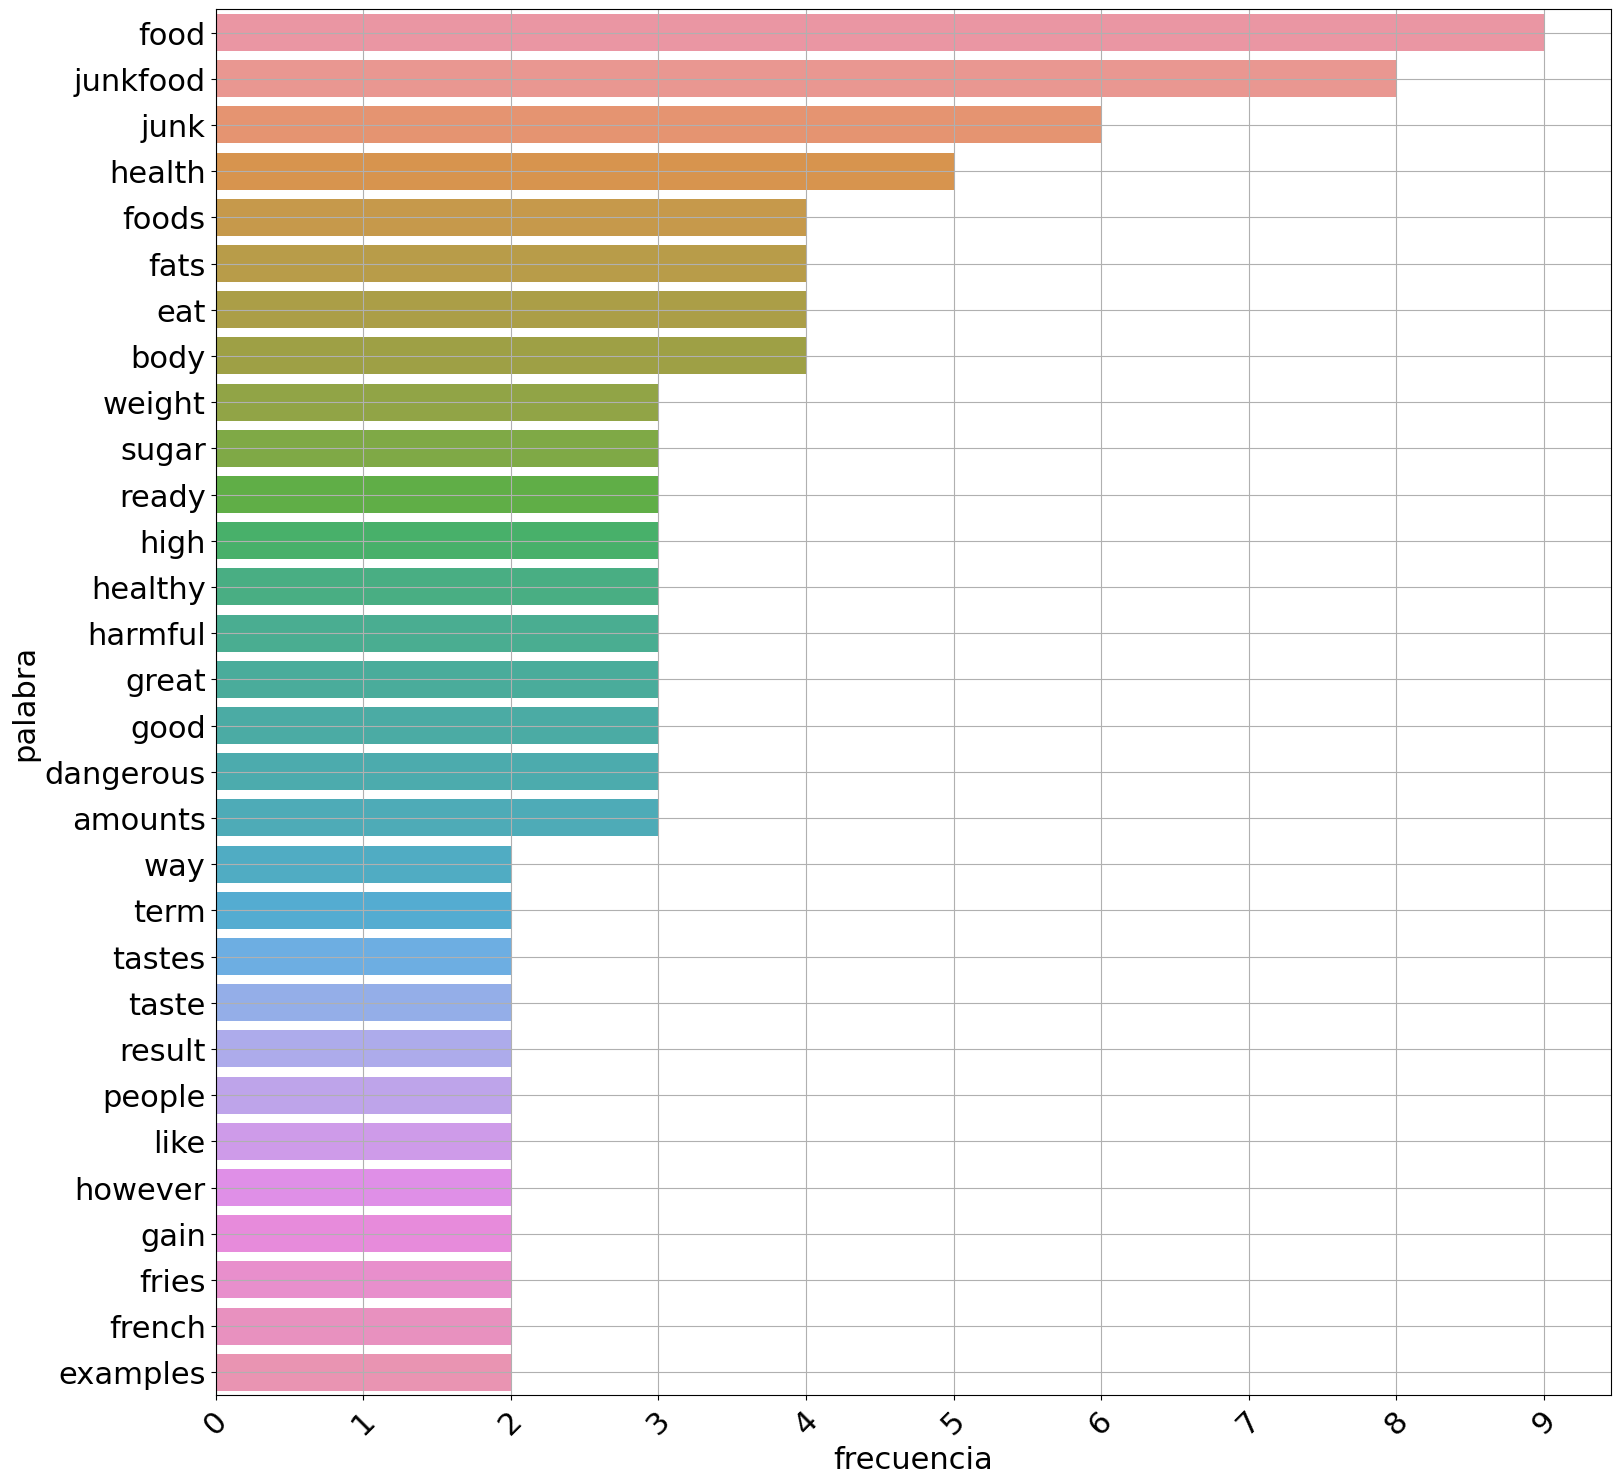

In [13]:
#Gráfica de barras de los resultados
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18, 18))
ax = sns.barplot(bow_processed_text[:30], x='frecuencia', y='palabra')
plt.xticks(rotation=45)
ax.set_xticks(list(range(0, 10, 1)))
ax.grid(True);

Otra forma de realizar la BOW, es con sklearn.

In [14]:
#importa countvectorizer de sklearn
from sklearn.feature_extraction.text import CountVectorizer
#Instancia el contador de palabras con la lista de palabras vacías previamente definidas
vectorizer = CountVectorizer(stop_words=stopwords_eng, ngram_range=(1,1))
# "Entrena" el modelo, es decir cuenta la frecuencia de cada palabra
counts = vectorizer.fit_transform([processed_text])
#Construye un dataframe con los resultados
bow_sklearn = pd.DataFrame(counts.toarray(), columns=vectorizer.get_feature_names_out())
bow_sklearn = bow_sklearn.T.reset_index()
bow_sklearn.rename(columns={'index':'palabra', 0:'frecuencia'}, inplace=True)
bow_sklearn.sort_values(by=['frecuencia', 'palabra'], ignore_index=True, inplace=True, ascending=False)

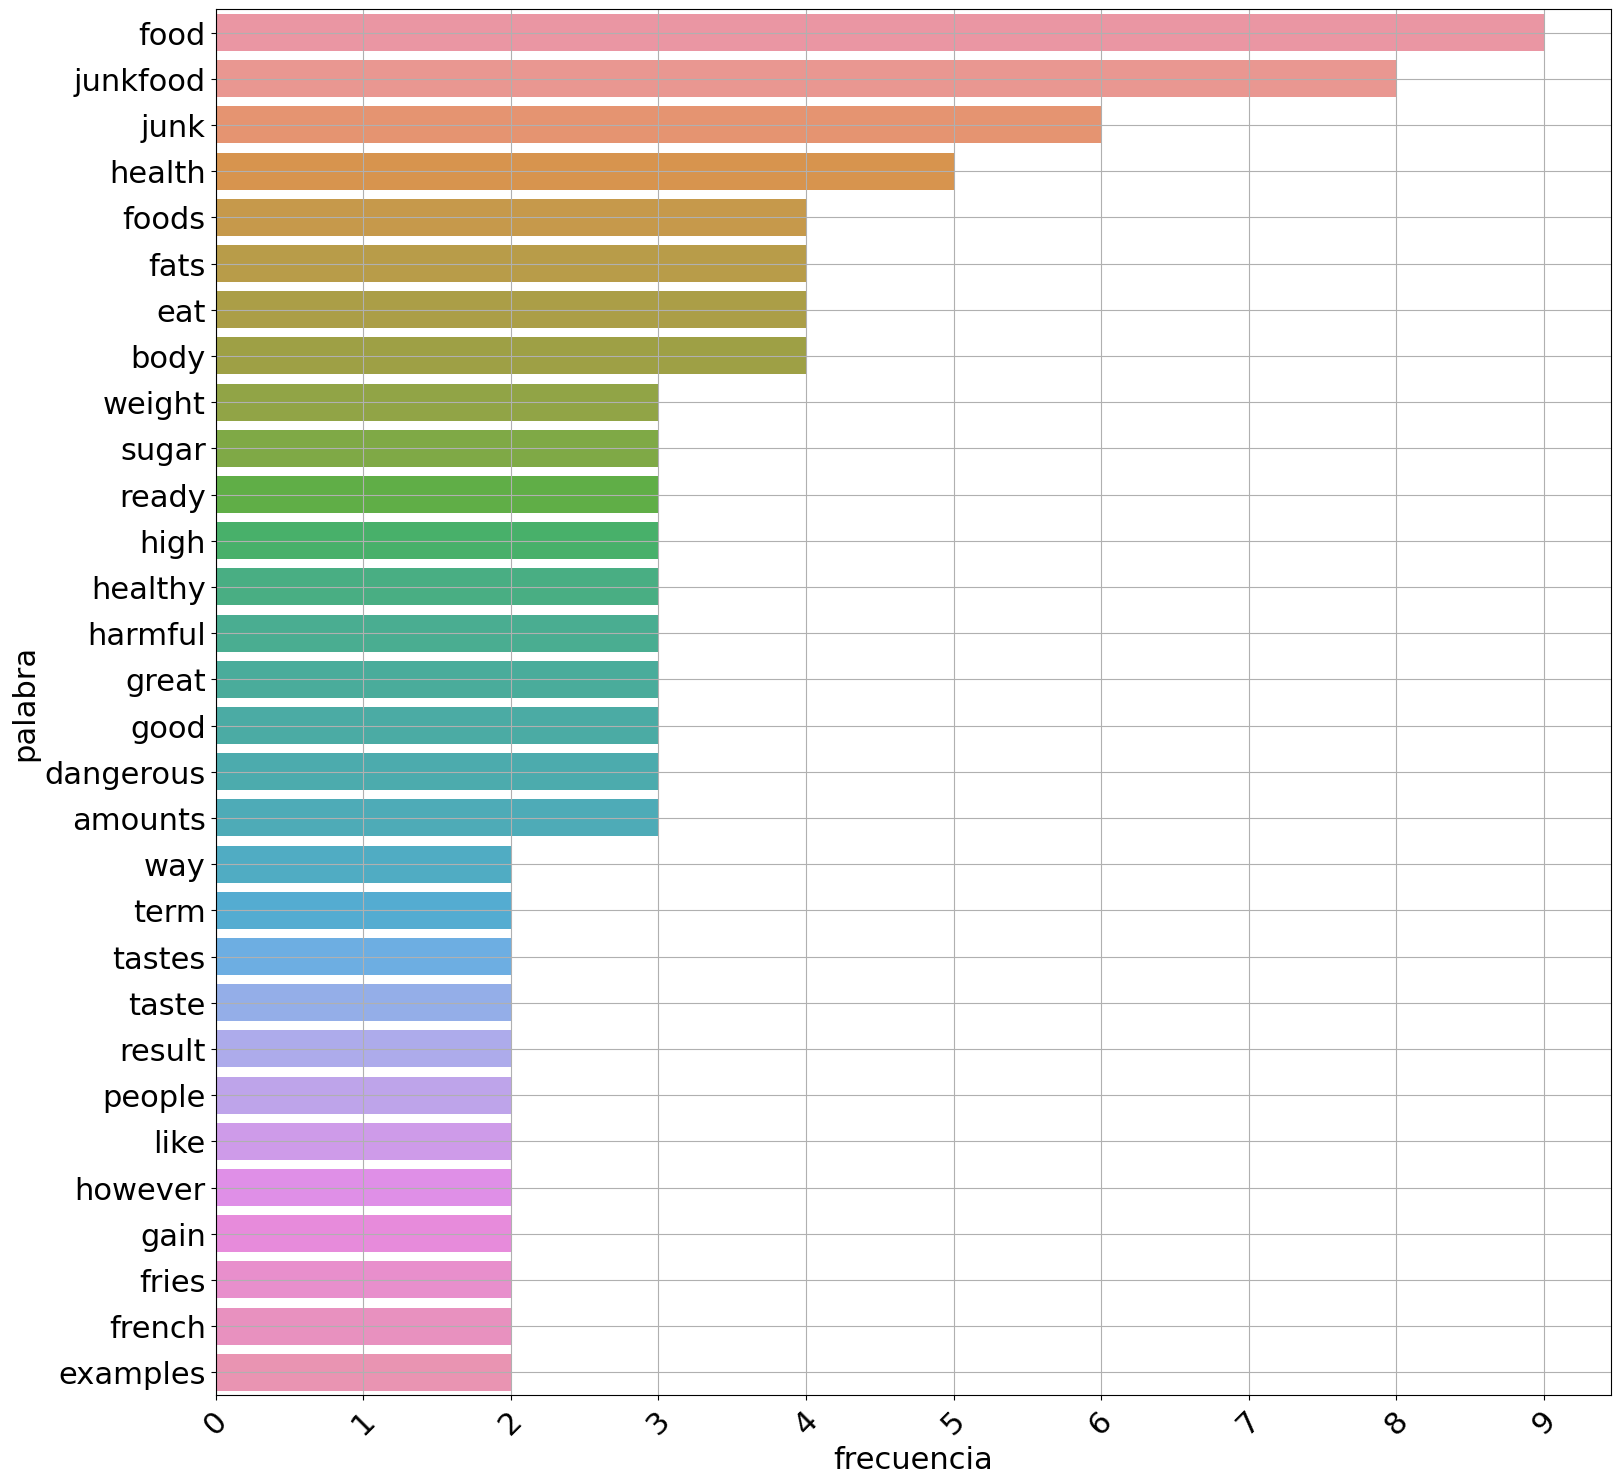

In [15]:
#Gráfica de barras de los resultados con sklearn
fig = plt.figure(figsize=(18, 18))
ax = sns.barplot(bow_sklearn[:30], x='frecuencia', y='palabra')
plt.xticks(rotation=45)
ax.set_xticks(list(range(0, 10, 1)))
ax.grid(True);

Un aspecto interesante son los n-grams, los cuales son conjuntos de palabras palabras que comúnmente requieren más de una palabra para dar significado a la misma, por ejemplo San Francisco es un bigrama (dos palabras) con la cual sabemos que se refiere a una ciudad. Otro ejemplo de bigrama es french fries.

Veamos que sucede si obtenemos una BOW con bigramas a través de sklearn

In [16]:
#Instancia el contador de palabras con la lista de palabras vacías previamente definidas y unicamente bigramas-trigramas
vectorizer = CountVectorizer(stop_words=stopwords_eng, ngram_range=(2,3))
# "Entrena" el modelo, es decir cuenta la frecuencia de cada palabra
counts = vectorizer.fit_transform([processed_text])
#Construye un dataframe con los resultados
bow_sklearn = pd.DataFrame(counts.toarray(), columns=vectorizer.get_feature_names_out())
bow_sklearn = bow_sklearn.T.reset_index()
bow_sklearn.rename(columns={'index':'palabra', 0:'frecuencia'}, inplace=True)
bow_sklearn.sort_values(by=['frecuencia', 'palabra'], ignore_index=True, inplace=True, ascending=False)

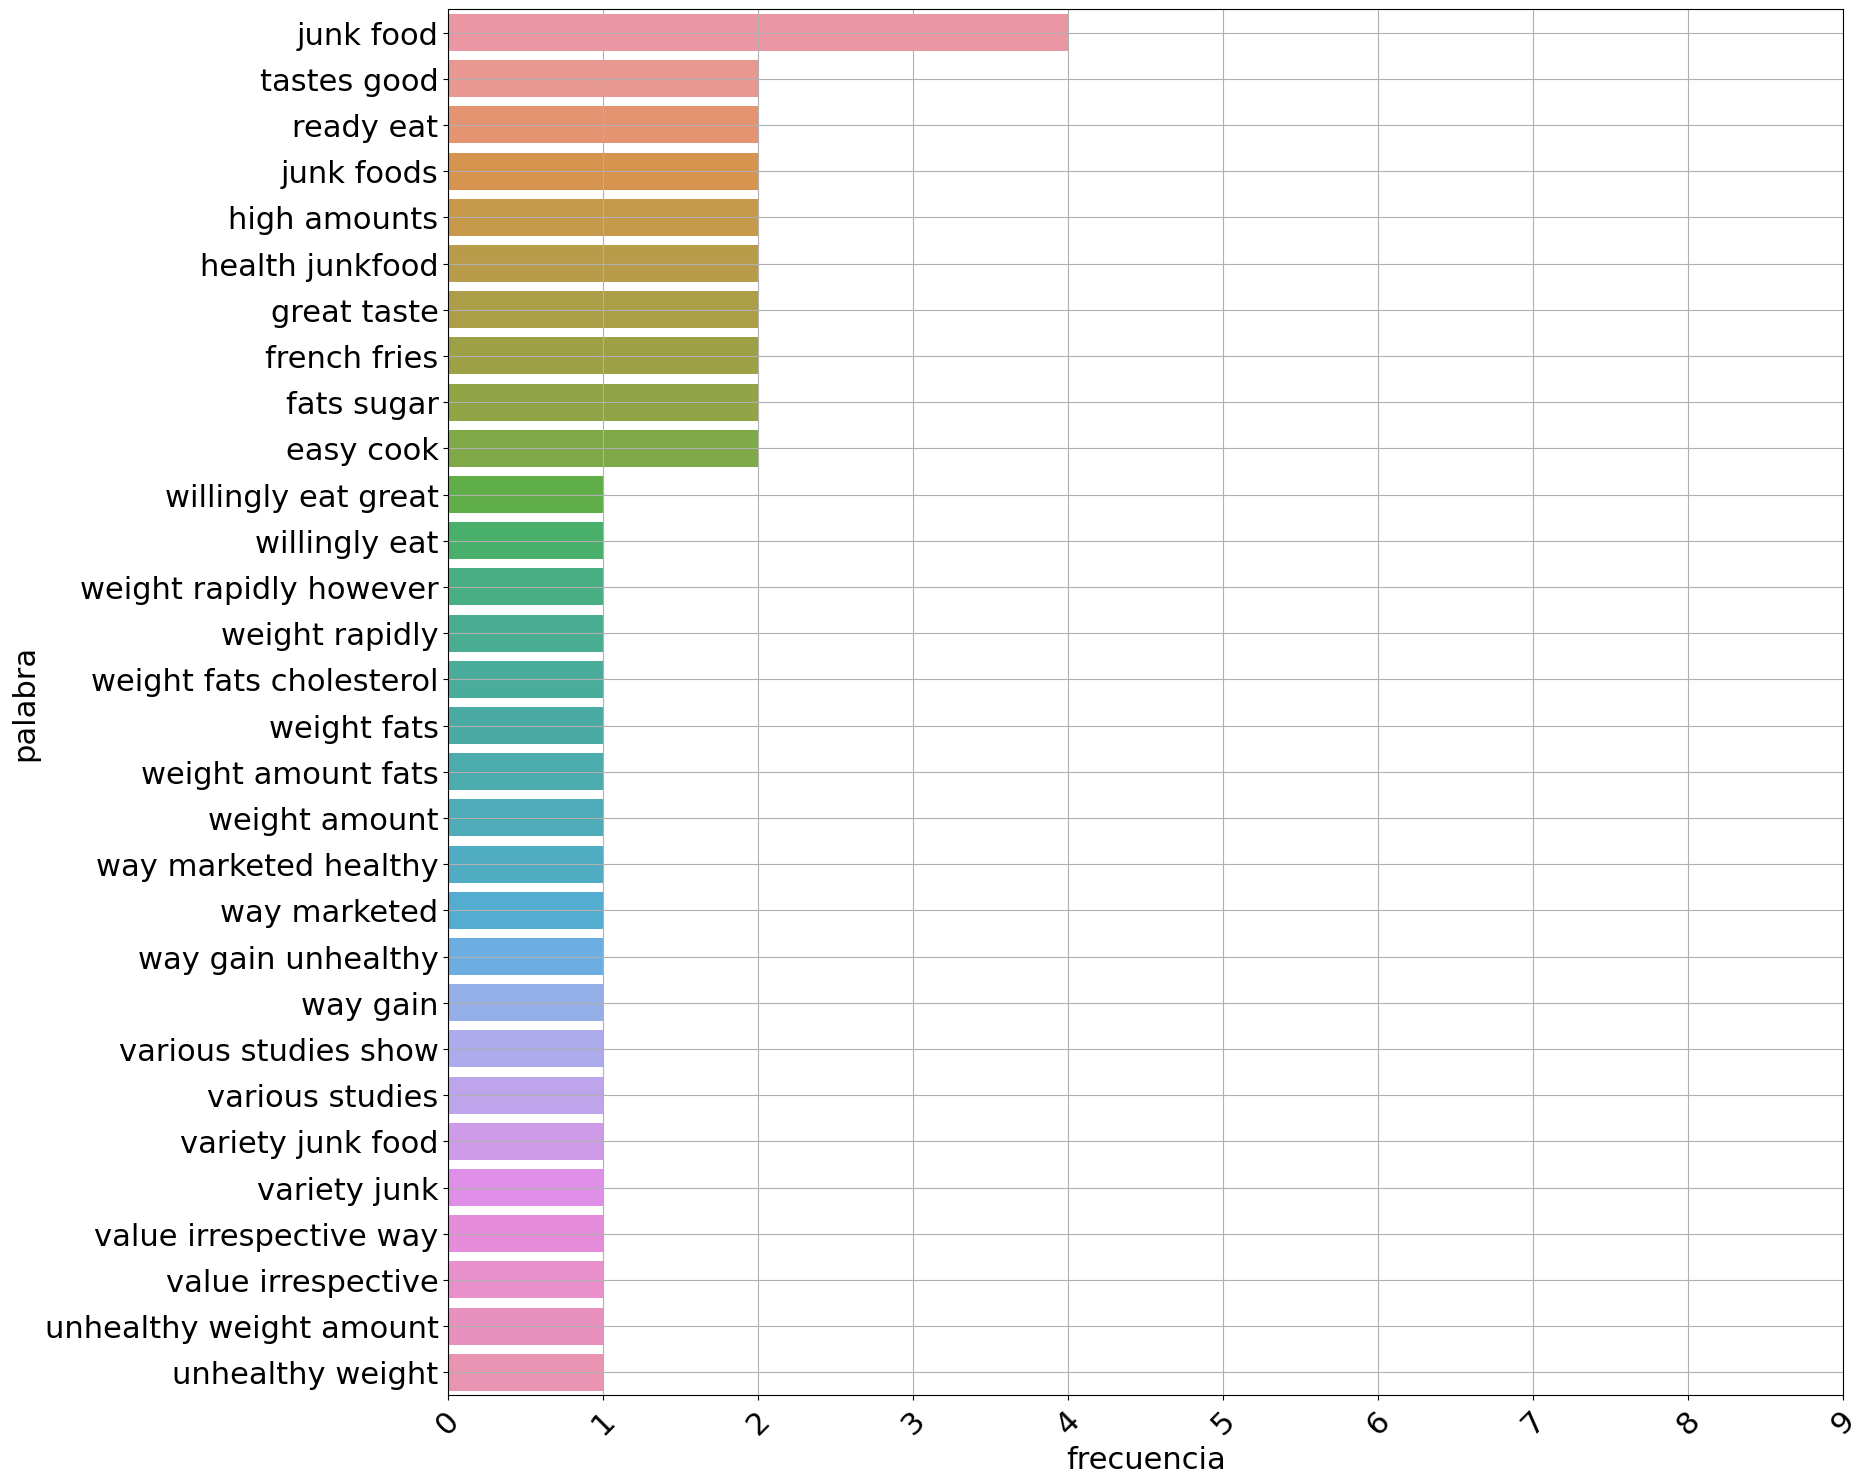

In [17]:
#Gráfica de barras de los resultados con sklearn
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18, 18))
ax = sns.barplot(bow_sklearn[:30], x='frecuencia', y='palabra')
plt.xticks(rotation=45)
ax.set_xticks(list(range(0, 10, 1)))
ax.grid(True);

Vemos que las palabras que más se repiten son "food", "junkfood", "health", "fats" y "eat". Mientras que para el caso de los bigramas y trigramas, las palabras que más se repiten son "junk food", "tastes good", "ready eat", "high amounts" y "health junkfood". A través de las palabras más comunes de ambos análisis podemos ver que el texto habla sobre la comida chatarra y sus efectos en la salud, la facilidad con la que uno puede comerla (ready to eat), entre otros factores.
Destaca el hecho de la existencia del trigrama "various studies", el cual puede darnos una idea de que este texto habla sobre estudios realizados sobre la comida chatarra y cita algunos otros estudios que podrían ser relevantes para el tema en cuestión.

Si bien este análisis es muy básico, nos da una idea de como podemos realizar un análisis de texto y obtener información relevante de los mismos. Así mismo como extraer palabras relevantes para realizar diversos tipos de análisis como por ejemplo sentitimiento, similitud, entre otros.
Tambien puede ser interesante realizar un análisis de texto con un corpus de textos, el cual nos permita ver como se comportan las palabras más comunes en un conjunto de textos relacionados. Aplicar técnicas como LDA para extraer los temas principales de los textos, rankeo más relevante de las palabras, entre otros.

### 2. ¿Qué consideraciones para realizar esta tarea hiciste?

* Algo relevante que se consideró es que la semántica del texto no importa, por lo que no se consideró el contexto de las palabras.
* También se consideró que el texto no tiene errores de ortografía, por lo que no se consideró el uso de herramientas como spellchecker para corregir errores de ortografía.
* Otro aspecto importante es que no se consideró el uso de stemming o lemmatization, por lo que se consideran palabras como "eat", "eats", "eating" como diferentes.
* En algunos textos, los signos de puntuación, contracciones, etc. pueden ser importantes para el análisis. Sin embargo, se consideró que no hay diferencia alguna.